In [2]:
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from IPython.display import HTML, display
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df = pd.read_csv("/Users/chetankulkarni/Documents/Python/network_traffic.csv")
df.head(n=10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,is_intrusion
0,0,tcp,http,SF,302,896,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,tcp,http,SF,339,1588,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,tcp,http,SF,260,7334,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,tcp,http,SF,213,8679,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,tcp,http,SF,308,1658,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,tcp,http,SF,230,505,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,tcp,http,SF,221,445,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,tcp,http,SF,329,2431,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,tcp,http,SF,271,688,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,tcp,http,SF,326,566,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.dtypes

duration               int64
protocol_type         object
service               object
flag                  object
src_bytes              int64
dst_bytes              int64
land                   int64
wrong_fragment         int64
urgent                 int64
hot                    int64
num_failed_logins      int64
logged_in              int64
num_compromised        int64
root_shell             int64
su_attempted           int64
num_root               int64
num_file_creations     int64
num_shells             int64
num_access_files       int64
num_outbound_cmds      int64
is_host_login          int64
is_guest_login         int64
is_intrusion          object
dtype: object

In [5]:
df.isnull().sum()

duration              0
protocol_type         0
service               0
flag                  0
src_bytes             0
dst_bytes             0
land                  0
wrong_fragment        0
urgent                0
hot                   0
num_failed_logins     0
logged_in             0
num_compromised       0
root_shell            0
su_attempted          0
num_root              0
num_file_creations    0
num_shells            0
num_access_files      0
num_outbound_cmds     0
is_host_login         0
is_guest_login        0
is_intrusion          0
dtype: int64

In [6]:
df.nunique()

duration               121
protocol_type            3
service                 16
flag                     6
src_bytes              626
dst_bytes             1346
land                     1
wrong_fragment           1
urgent                   1
hot                      9
num_failed_logins        1
logged_in                2
num_compromised          4
root_shell               2
su_attempted             2
num_root                 5
num_file_creations       2
num_shells               2
num_access_files         4
num_outbound_cmds        1
is_host_login            1
is_guest_login           2
is_intrusion             3
dtype: int64

In [7]:
(df.is_intrusion =="0=").sum()

1

In [8]:
df.drop(df[df.is_intrusion=="0="].index,axis = 0,inplace = True)

In [9]:
df.shape

(2999, 23)

In [10]:
for col in df.columns:
    print(col, len(df[col].unique()))


duration 121
protocol_type 3
service 16
flag 6
src_bytes 626
dst_bytes 1345
land 1
wrong_fragment 1
urgent 1
hot 9
num_failed_logins 1
logged_in 2
num_compromised 4
root_shell 2
su_attempted 2
num_root 5
num_file_creations 2
num_shells 2
num_access_files 4
num_outbound_cmds 1
is_host_login 1
is_guest_login 2
is_intrusion 2


In [11]:
dur_mean = df['duration'].mean()

In [12]:
df['duration'].value_counts()

0        2625
1          85
280        30
2          24
282        22
5          14
3          13
4           8
901         7
805         6
281         5
283         5
31          4
796         4
899         3
7           3
2075        3
14          3
25          3
22          3
907         3
10          3
2470        3
2474        3
15          3
19          2
2066        2
13          2
2065        2
16          2
         ... 
33          1
37          1
2100        1
65          1
2128        1
97          1
103         1
137         1
189         1
2634        1
8118        1
4777        1
948         1
898         1
15122       1
904         1
908         1
11020       1
926         1
938         1
13306       1
4785        1
3581        1
1600        1
1816        1
12151       1
6052        1
1974        1
4791        1
2015        1
Name: duration, Length: 121, dtype: int64

In [13]:
df['duration'].replace(0,dur_mean, inplace=True)

In [14]:
df['duration'].value_counts()

118.117372      2625
1.000000          85
280.000000        30
2.000000          24
282.000000        22
5.000000          14
3.000000          13
4.000000           8
901.000000         7
805.000000         6
281.000000         5
283.000000         5
31.000000          4
796.000000         4
2075.000000        3
907.000000         3
2470.000000        3
25.000000          3
22.000000          3
7.000000           3
15.000000          3
2474.000000        3
899.000000         3
14.000000          3
10.000000          3
902.000000         2
912.000000         2
2594.000000        2
798.000000         2
2054.000000        2
                ... 
8118.000000        1
13306.000000       1
803.000000         1
4447.000000        1
2100.000000        1
189.000000         1
3581.000000        1
1949.000000        1
8470.000000        1
2015.000000        1
11544.000000       1
1816.000000        1
804.000000         1
4910.000000        1
12765.000000       1
24204.000000       1
33.000000    

In [15]:
df.drop(['land','wrong_fragment','urgent','num_failed_logins','num_outbound_cmds','is_host_login'], axis = 1, inplace = True)

In [16]:
categorical = ['protocol_type','service','flag']

df1 = pd.get_dummies(df, columns =categorical )

In [17]:
df1.dtypes

duration              float64
src_bytes               int64
dst_bytes               int64
hot                     int64
logged_in               int64
num_compromised         int64
root_shell              int64
su_attempted            int64
num_root                int64
num_file_creations      int64
num_shells              int64
num_access_files        int64
is_guest_login          int64
is_intrusion           object
protocol_type_icmp      uint8
protocol_type_tcp       uint8
protocol_type_udp       uint8
service_auth            uint8
service_domain_u        uint8
service_eco_i           uint8
service_ecr_i           uint8
service_finger          uint8
service_ftp             uint8
service_ftp_data        uint8
service_http            uint8
service_ntp_u           uint8
service_other           uint8
service_pop_3           uint8
service_private         uint8
service_smtp            uint8
service_telnet          uint8
service_time            uint8
service_urp_i           uint8
flag_REJ  

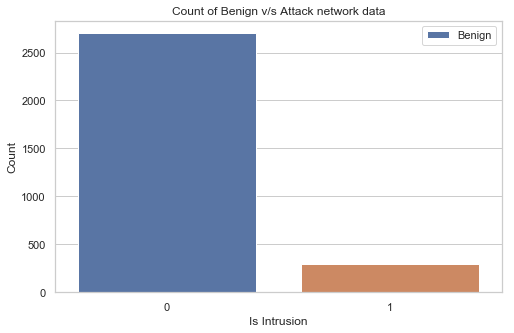

In [18]:
# plotting the benign and intrusion network calls
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("whitegrid")
sns.countplot(df1['is_intrusion'])
plt.legend(["Benign","Attack"],loc = 'upper right')
plt.xlabel("Is Intrusion")
plt.ylabel("Count")
plt.title("Count of Benign v/s Attack network data")
plt.show()

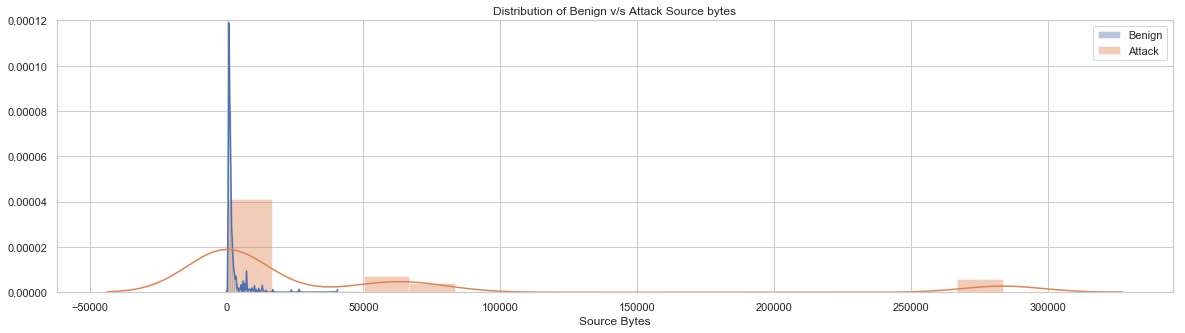

In [19]:
# plotting the src_bytes for benign Vs attack
sns.set(rc={'figure.figsize':(20,5)})
sns.set_style("whitegrid")
plt.ylim(0, 0.00012)
sns.distplot(df1[df1['is_intrusion'] == "0"]['src_bytes'])
sns.distplot(df1[df1['is_intrusion'] == "1"]['src_bytes'])
plt.legend(["Benign","Attack"],loc = 'upper right')
plt.xlabel("Source Bytes")
plt.title("Distribution of Benign v/s Attack Source bytes")
plt.show()

Text(0, 0.5, 'Score Frequency')

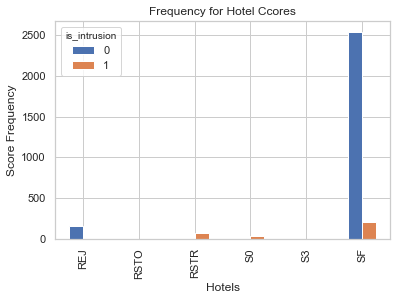

In [20]:
#Bar Plot
%matplotlib inline
pd.crosstab(df.flag,df.is_intrusion).plot(kind='bar')
plt.title('Frequency for Hotel Ccores')
plt.xlabel('Hotels')
plt.ylabel('Score Frequency')

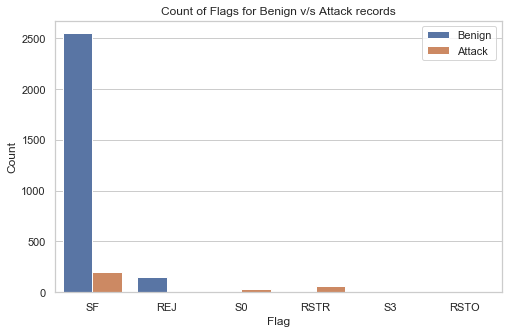

In [21]:
# splitting the benign and intrusion on the flag
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("whitegrid")
sns.countplot(x = "flag",data = df,hue="is_intrusion")
plt.legend(["Benign","Attack"],loc = 'upper right')
plt.xlabel("Flag")
plt.ylabel("Count")
plt.title("Count of Flags for Benign v/s Attack records")
plt.show()

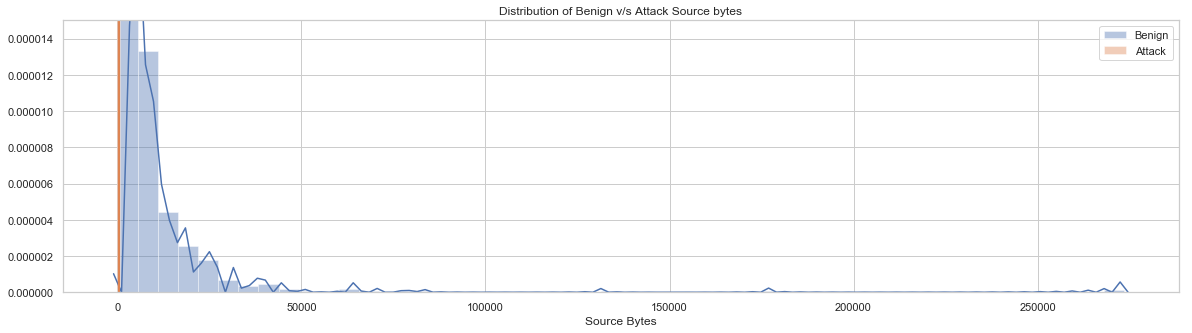

In [22]:
# plotting the src_bytes for benign Vs attack
sns.set(rc={'figure.figsize':(20,5)})
sns.set_style("whitegrid")
plt.ylim(0.0000, 0.0000150)
sns.distplot(df1[df1['is_intrusion'] == "0"]['dst_bytes'])
sns.distplot(df1[df1['is_intrusion'] == "1"]['dst_bytes'])
plt.legend(["Benign","Attack"],loc = 'upper right')
plt.xlabel("Source Bytes")
plt.title("Distribution of Benign v/s Attack Source bytes")
plt.show()

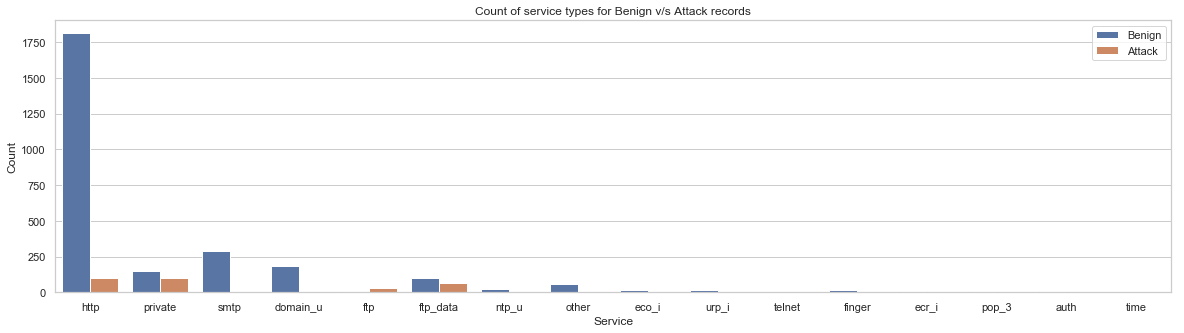

In [23]:
# splitting the benign and intrusion on the flag
sns.set(rc={'figure.figsize':(20,5)})
sns.set_style("whitegrid")
sns.countplot(x = "service",data = df,hue="is_intrusion")
plt.legend(["Benign","Attack"],loc = 'upper right')
plt.xlabel("Service")
plt.ylabel("Count")
plt.title("Count of service types for Benign v/s Attack records")
plt.show()

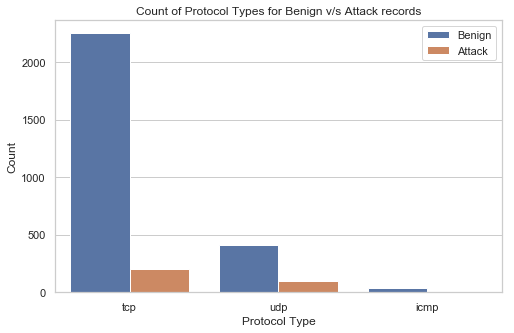

In [24]:
# splitting the benign and intrusion on the protocol_type
sns.set(rc={'figure.figsize':(8,5)})
sns.set_style("whitegrid")
sns.countplot(x = "protocol_type",data = df, hue="is_intrusion")
plt.legend(["Benign","Attack"],loc = 'upper right')
plt.xlabel("Protocol Type")
plt.ylabel("Count")
plt.title("Count of Protocol Types for Benign v/s Attack records")
plt.show()

,duration,src_bytes,dst_bytes,hot,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,is_guest_login
duration,1.000000,0.047718,0.064746,-0.008506,-0.118287,0.285680,0.162702,0.285679,0.285482,-0.006006,-0.001982,0.234892,-0.001004
src_bytes,0.047718,1.000000,-0.039296,0.008825,-0.119456,-0.002135,-0.004292,-0.002117,-0.002288,0.001699,-0.000157,-0.005358,-0.018060
dst_bytes,0.064746,-0.039296,1.000000,-0.004794,0.166046,0.318291,0.180890,0.318132,0.317724,-0.007868,-0.004945,0.262399,-0.022823
hot,-0.008506,0.008825,-0.004794,1.000000,0.047324,-0.001108,0.023848,-0.001513,-0.001618,-0.002621,-0.001513,-0.003533,0.616114
logged_in,-0.118287,-0.119456,0.166046,0.047324,1.000000,0.011536,0.019852,0.011458,0.012255,0.019852,0.011458,0.026755,0.077432
num_compromised,0.285680,-0.002135,0.318291,-0.001108,0.011536,1.000000,0.577148,0.999988,0.999762,-0.000582,-0.000336,0.833438,-0.002269
root_shell,0.162702,-0.004292,0.180890,0.023848,0.019852,0.577148,1.000000,0.577158,0.576999,-0.001001,-0.000578,0.480454,-0.003906
su_attempted,0.285679,-0.002117,0.318132,-0.001513,0.011458,0.999988,0.577158,1.000000,0.999773,-0.000578,-0.000334,0.833451,-0.002254
num_root,0.285482,-0.002288,0.317724,-0.001618,0.012255,0.999762,0.576999,0.999773,1.000000,-0.000618,-0.000357,0.833227,-0.002411
num_file_creations,-0.006006,0.001699,-0.007868,-0.002621,0.019852,-0.000582,-0.001001,-0.000578,-0.000618,1.000000,-0.000578,-0.001349,-0.003906


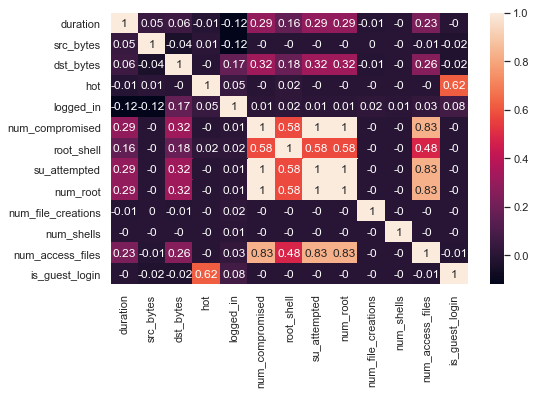

In [25]:

correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

df.corr()

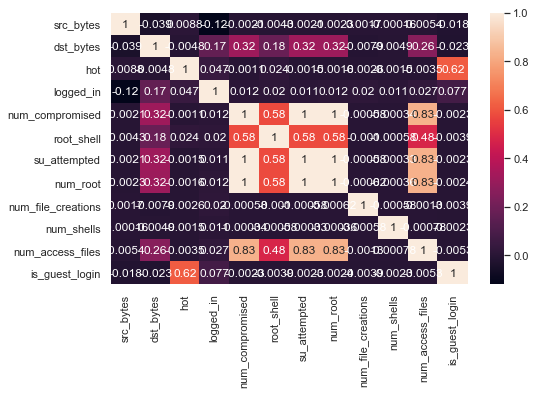

In [26]:
dty = df.dtypes
sns.heatmap(df1.loc[:,dty[(dty=='int64')].index].corr(),annot=True)
plt.show()

In [27]:
df.drop(['num_root', 'su_attempted'], axis=1, inplace=True)


In [28]:
df1.corr()

,duration,src_bytes,dst_bytes,hot,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,...,service_smtp,service_telnet,service_time,service_urp_i,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_S3,flag_SF
duration,1.000000,0.047718,0.064746,-0.008506,-0.118287,0.285680,0.162702,0.285679,0.285482,-0.006006,...,-0.054563,0.170041,-0.004378,-0.007161,-0.025251,-0.001982,0.138354,-0.011448,0.034427,-0.051024
src_bytes,0.047718,1.000000,-0.039296,0.008825,-0.119456,-0.002135,-0.004292,-0.002117,-0.002288,0.001699,...,-0.031802,-0.004039,-0.004006,-0.009844,-0.036083,-0.002832,0.267453,-0.016359,0.054499,-0.109816
dst_bytes,0.064746,-0.039296,1.000000,-0.004794,0.166046,0.318291,0.180890,0.318132,0.317724,-0.007868,...,-0.076921,0.249502,-0.006985,-0.017867,-0.063000,-0.004945,-0.040302,-0.028562,-0.006995,0.082545
hot,-0.008506,0.008825,-0.004794,1.000000,0.047324,-0.001108,0.023848,-0.001513,-0.001618,-0.002621,...,-0.027104,-0.002621,-0.002140,-0.005466,-0.019273,-0.001513,-0.012330,-0.008738,-0.002140,0.025253
logged_in,-0.118287,-0.119456,0.166046,0.047324,1.000000,0.011536,0.019852,0.011458,0.012255,0.019852,...,0.205265,0.019852,-0.041177,-0.105173,-0.370850,0.011458,0.093379,-0.168132,0.016207,0.305336
num_compromised,0.285680,-0.002135,0.318291,-0.001108,0.011536,1.000000,0.577148,0.999988,0.999762,-0.000582,...,-0.006016,0.577802,-0.000475,-0.001213,-0.004278,-0.000336,-0.002737,-0.001939,-0.000475,0.005605
root_shell,0.162702,-0.004292,0.180890,0.023848,0.019852,0.577148,1.000000,0.577158,0.576999,-0.001001,...,-0.010353,0.332666,-0.000817,-0.002088,-0.007362,-0.000578,-0.004710,-0.003338,-0.000817,0.009646
su_attempted,0.285679,-0.002117,0.318132,-0.001513,0.011458,0.999988,0.577158,1.000000,0.999773,-0.000578,...,-0.005976,0.577158,-0.000472,-0.001205,-0.004249,-0.000334,-0.002718,-0.001926,-0.000472,0.005568
num_root,0.285482,-0.002288,0.317724,-0.001618,0.012255,0.999762,0.576999,0.999773,1.000000,-0.000618,...,-0.006264,0.576999,-0.000505,-0.001289,-0.004545,-0.000357,-0.002907,-0.002060,-0.000505,0.005955
num_file_creations,-0.006006,0.001699,-0.007868,-0.002621,0.019852,-0.000582,-0.001001,-0.000578,-0.000618,1.000000,...,0.061026,-0.001001,-0.000817,-0.002088,-0.007362,-0.000578,-0.004710,-0.003338,-0.000817,0.009646


In [29]:
df1

,duration,src_bytes,dst_bytes,hot,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,...,service_smtp,service_telnet,service_time,service_urp_i,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_S3,flag_SF
0,118.117372,302,896,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,118.117372,339,1588,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,118.117372,260,7334,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,118.117372,213,8679,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,118.117372,308,1658,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,118.117372,230,505,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,118.117372,221,445,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,118.117372,329,2431,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,118.117372,271,688,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,118.117372,326,566,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
from sklearn.model_selection import train_test_split
ydata = df1.is_intrusion
Xdata = df1.drop('is_intrusion', axis=1)
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.2, random_state = 25)

In [31]:
# Using SMOTE to balance the train data we have
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_sample(Xtrain,np.array(ytrain).ravel())